# Principle Component Analysis

> Note: Python3 is used

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset 

In [2]:
from sklearn.datasets import make_moons # Make two concentric

In [3]:
x, y = make_moons(n_samples=100, shuffle=True)

In [4]:
X = (x-x.mean(axis=0)).T  #transpose for consistancy with the notation followed in lecture
print(X.mean(axis=1)) # the dataset is zero mean by default

[ 3.27515792e-17 -4.44089210e-18]


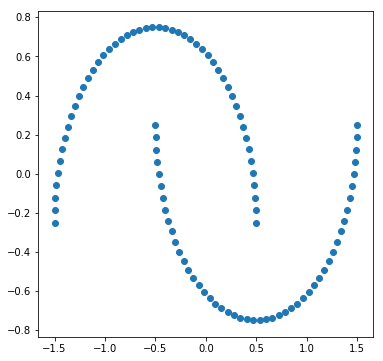

In [5]:
#plotting
plt.figure(1, figsize=(6,6))
plt.scatter(X[0], X[1])
plt.show()

## Vanilla PCA

In [6]:
N = len(X.T)
Cx = X@X.T / N
l, Ex = np.linalg.eig(Cx)
print('eigenvalues:', l)
print('eigenvectors:\n', Ex)

eigenvalues: [0.82023108 0.1804321 ]
eigenvectors:
 [[ 0.95176645  0.30682345]
 [-0.30682345  0.95176645]]


In [7]:
P = Ex.T
Y = P @ X

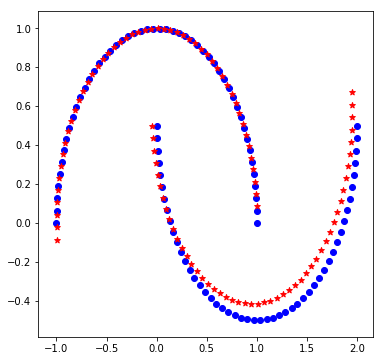

In [8]:
#plotting
plt.figure(2, figsize=(6,6))
plt.scatter(X[0], X[1], c='b', marker='o')
plt.scatter(Y[0], Y[1], c='r', marker='*')
plt.show()

The principle components appear to be just a rotated version of original data points. These are not linearly seperable.  

####  Dimensionality reduction
Using eigenvector corresponding to one of the equal eigenvalue 

In [9]:
P1 = Ex.T[0] # eigenvector corresponding to largest eigenvalue
Y1 = P1@X

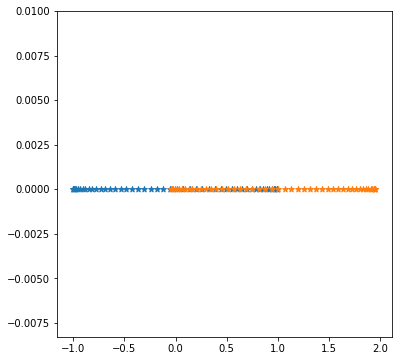

In [10]:
plt.figure(3, figsize=(6,6))
# plotting w.r.t labels for better visualization - 
plt.scatter(Y1[np.where(y==0)], np.zeros_like(np.where(y==0)), marker='*')
plt.scatter(Y1[np.where(y==1)], np.zeros_like(np.where(y==1)), marker='*')
plt.show()

We can observe that the transformed data points (or principle components - with and without dimensionality reduction) are **not linearly seperable** and is not helpful for further classification/clustering. So, this representation is useless -  Linear PCA fails in this case.

## Kernel PCA 
##### Summary of KPCA from Notes
1. Pick a kernel $K$
2. Form a matrix $\tilde{K}$ from the kernel and data points
3. find $\lambda_j, \mathbf{a}_j$ of $\tilde{K}$
4. Project new point $x$ using eigenvectors. Dimensionality reduction as usual

In [11]:
# RBF Kernel
def rbf_kernel(x, y, gamma=0.5):
    # gamma = 1/(2*sigma^2) - from Wikipedia
    assert gamma>0, 'gamma must be positive'
    k = np.exp(-gamma * np.linalg.norm(x-y)**2)
    return k

In [12]:
K = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        K[i,j] = rbf_kernel(X.T[i], X.T[j], gamma=15)

In [13]:
Q = np.ones((N,N))/N
K1 = K - Q@K - K@Q + Q@K@Q

In [19]:
eigvals, eigvecs = np.linalg.eig(K1) 

In [21]:
c = np.argsort(eigvals.real)[-2:] # take first two largest eigenvalues

In [24]:
req_eigvecs = eigvecs[c].T

In [25]:
req_eigvecs /= np.sqrt(eigvals[c])

In [26]:
req_eigvecs.shape

(100, 2)

In [27]:
Yrbf = K1 @ req_eigvecs

(100, 2)

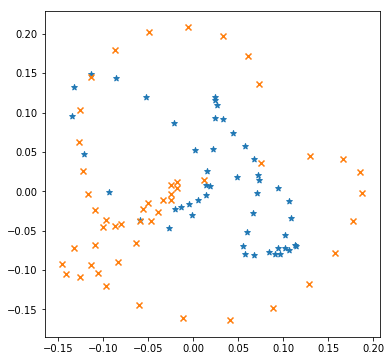

In [31]:
plt.figure(4, figsize=(6,6))
# plotting w.r.t labels for better visualization - 
plt.scatter(Yrbf[np.where(y==0),0], Yrbf[np.where(y==0),1], marker='*')
plt.scatter(Yrbf[np.where(y==1),0], Yrbf[np.where(y==1),1], marker='x')
plt.show()